In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Let's import the dataset `exercise.csv` into a Pandas dataframe `df`:

In [2]:
df = pd.read_csv("exercise.csv")

And let's also take a look at what we have

In [3]:
df

,Var1,Var2,Var3
0,1.391307,1.437120,-0.099913
1,1.485588,1.337144,0.223548
2,1.203553,1.602119,-0.114064
3,1.189041,1.588273,-0.116481
4,1.301933,1.435839,0.311574
...,...,...,...
185,1.218505,0.833437,0.091165
186,1.033752,1.048449,-0.168816
187,1.139916,0.963989,-0.033512
188,1.029995,1.086967,-0.044282


Ok, so we have three variables, `Var1`, `Var2`, `Var3` and 190 observations.

Is there any structure to this? Let's plot!

## Exercise 1a
Plot each pair of variables against each other. You *could* extract the three columns from the data frame and plot each pair against each other with `plt.plot`, but I recommend that you try the following instead:

- You can directly plot, for example `Var2` against `Var1`, from the dataframe `df` using `df.plot.scatter('Var1','Var2')`. You might want to make the points smaller by adding the optional argument `marker='.'`), i.e. `df.plot.scatter('Var1','Var2',marker='.')`. An advantage with this is that you will automatically get appropriate axis labels.

Plot all three pairs of variables against each other, i.e. `Var1-Var2`, `Var1-Var3`, `Var2-Var3`, and submit all three plots.

<AxesSubplot:xlabel='Var3', ylabel='Var2'>

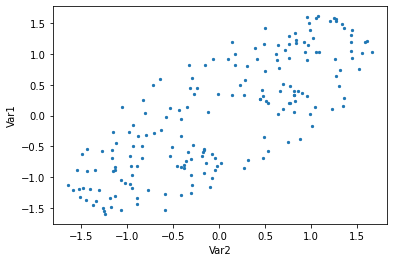

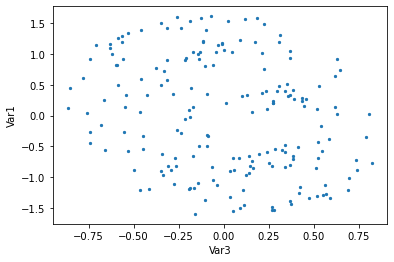

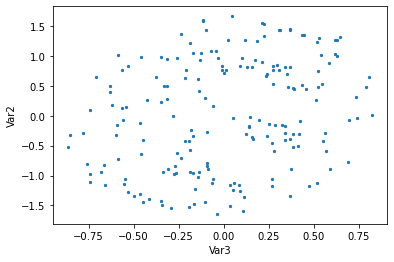

In [24]:
# Do what you gotta do.
df.plot.scatter('Var2', 'Var1', marker='.')
df.plot.scatter('Var3', 'Var1', marker='.')
df.plot.scatter('Var3', 'Var2', marker='.')

## Exercise 1b
1. Create a new dataframe `Yp` with the three principal components as columns. Label the columns `Pc1`, `Pc2` and `Pc3`.
2. Plot each pair of principal components against each other. You can do it like you did in Part (a), but I recommend that you add the line `plt.axis('equal')` to adjust the aspect ratio of your plot. This way you get a better sense of the difference in variance between the three principal components. Submit all three plots in LAMS.
3. Calculate how much (how many percent) of the total variance that is contained in the first *two* principal components, and submit your answer in LAMS. Recall that the variance of the principal components is found in the eigenvalues.

In [17]:
# Do it!
# You can pretty much copy what was done in the notebook accompanying the lectures,
# but even if you are just mimicking what was done there, try to understand what's going on.
# If you are confused by something, you can always ask me.
X

,Var1,Var2,Var3
0,1.391307,1.437120,-0.099913
1,1.485588,1.337144,0.223548
2,1.203553,1.602119,-0.114064
3,1.189041,1.588273,-0.116481
4,1.301933,1.435839,0.311574
...,...,...,...
185,1.218505,0.833437,0.091165
186,1.033752,1.048449,-0.168816
187,1.139916,0.963989,-0.033512
188,1.029995,1.086967,-0.044282


In [9]:
X = df.loc[:, ['Var1', 'Var2', 'Var3']]

S = X.cov()
R = X.corr()
print(S, '\n', R)

          Var1      Var2      Var3
Var1  0.829701  0.651682 -0.099554
Var2  0.651682  0.827619  0.099318
Var3 -0.099554  0.099318  0.163955 
           Var1      Var2      Var3
Var1  1.000000  0.786430 -0.269922
Var2  0.786430  1.000000  0.269618
Var3 -0.269922  0.269618  1.000000


In [10]:
Y = X - X.mean()
Y

,Var1,Var2,Var3
0,1.393566,1.416998,-0.108243
1,1.487847,1.317022,0.215218
2,1.205812,1.581997,-0.122394
3,1.191300,1.568150,-0.124811
4,1.304192,1.415717,0.303244
...,...,...,...
185,1.220764,0.813315,0.082835
186,1.036011,1.028327,-0.177146
187,1.142175,0.943866,-0.041842
188,1.032253,1.066845,-0.052612


In [11]:
l, Q = np.linalg.eig(S)
idx = l.argsort()[::-1]
l = l[idx]
Q = Q[:, idx]

In [12]:
print(l, '\n', Q)

[1.48034314 0.31123996 0.02969149] 
 [[-7.07687746e-01 -5.10906749e-01  4.88008554e-01]
 [-7.06525306e-01  5.11957558e-01 -4.88591291e-01]
 [ 2.15079262e-04  6.90560463e-01  7.23274638e-01]]


In [14]:
Yp = Y @ Q
Yp.columns = ['Pc1', 'Pc2', 'Pc3']

(-1.1481727422173935,
 1.1344394170052223,
 -0.33086634233405754,
 0.3394268906379864)

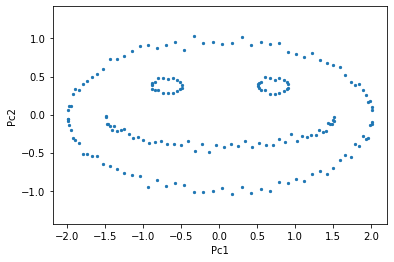

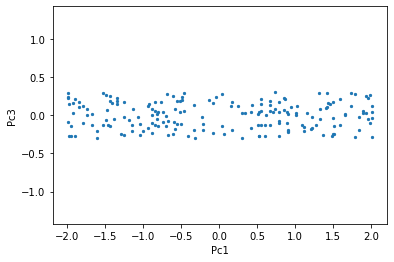

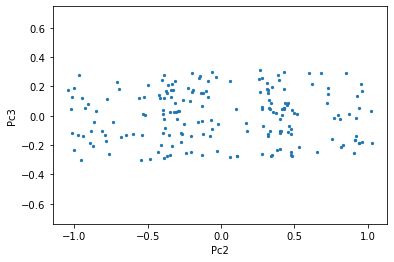

In [27]:
Yp.plot.scatter('Pc1', 'Pc2', marker='.')
plt.axis('Equal')
Yp.plot.scatter('Pc1', 'Pc3', marker='.')
plt.axis('Equal')
Yp.plot.scatter('Pc2', 'Pc3', marker='.')
plt.axis('Equal')

In [23]:
pct = sum(l[:2])/sum(l)
pct * 100

98.36974103077247